In [66]:
import pandas as pd
from numpy import arange
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
# Read from CSV

df = pd.read_csv('Outputs/packets-http-wout-comp-2021.10.01-processed')


In [68]:
# Setting global var

proto = 'TCP'
srcport = 8080
encoding = 'plaintext'
text = 'HTTP'

In [69]:
# Add a new column to the end called 'flow'

df['flow'] = df['srcip'] + ':' + df.srcport.map(str) + ' -> ' + df['dstip'] + ':' + df.dstport.map(str)
# Read a specific location (R,C)
print('Example of flow {}'.format(df.iloc[5,10]))

Example of flow 127.0.0.1:11511 -> 127.0.0.1:8080


In [70]:
# Sort dataframe by an index (column) and show

df = df.sort_values(['payload_size','flow'])
print(df.iloc[:,6:11])

    payload_size   shannon      bien     tbien  \
1            410  0.358754  0.624768  0.868867   
8            410  0.358636  0.624691  0.868722   
18           410  0.358962  0.624682  0.868586   
37           410  0.358684  0.624752  0.868890   
40           410  0.358695  0.624694  0.868713   
42           410  0.358711  0.624765  0.868818   
44           410  0.358954  0.624750  0.868780   
47           410  0.358768  0.624746  0.868879   
3            410  0.358962  0.624682  0.868586   
10           410  0.358962  0.624764  0.868805   
49           410  0.358754  0.624768  0.868867   
2            410  0.358962  0.624682  0.868586   
16           410  0.358962  0.624764  0.868805   
48           410  0.358754  0.624768  0.868867   
33           410  0.358962  0.624682  0.868586   
34           410  0.358962  0.624682  0.868586   
32           410  0.358962  0.624682  0.868586   
38           410  0.358962  0.624764  0.868805   
19           411  0.358548  0.617304  0.871684   


In [71]:
# Filtering by port

is_port = df['srcport']==srcport
print(is_port.head())
df = df[is_port]

1     True
8     True
18    True
37    True
40    True
Name: srcport, dtype: bool


In [72]:
# Filtering by the number of packets of chosen size

is_bytes = df['payload_size']>2
print(is_bytes.head())
df = df[is_bytes]

1     True
8     True
18    True
37    True
40    True
Name: payload_size, dtype: bool


In [73]:
# Minimize number of displayed columns

# pd.set_option("display.max.columns", None)
# df.head()

In [74]:
# Aggregation by flow and each entropies mean

df[['flow','shannon','bien','tbien','payload_size']].groupby('flow').mean().sort_values('tbien', ascending=False)

,shannon,bien,tbien,payload_size
flow,,,,
127.0.0.1:8080 -> 127.0.0.1:11513,0.358755,0.620993,0.870135,410.500000
127.0.0.1:8080 -> 127.0.0.1:11514,0.358755,0.620993,0.870135,410.500000
127.0.0.1:8080 -> 127.0.0.1:11511,0.358807,0.622880,0.869486,410.250000
127.0.0.1:8080 -> 127.0.0.1:11512,0.358807,0.622880,0.869486,410.250000
127.0.0.1:8080 -> 127.0.0.1:11515,0.333473,0.615409,0.866543,905.333333
127.0.0.1:8080 -> 127.0.0.1:11510,0.334004,0.609714,0.856657,2238.500000


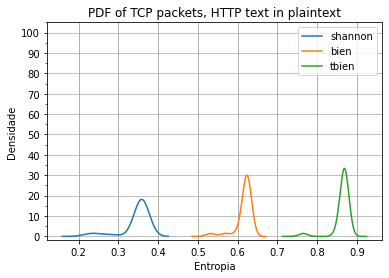

In [75]:
# Plot 1

title = 'PDF of {} packets, {} text in {}'.format(proto, text, encoding)
ax = df.plot(x='payload_size', y=['shannon','bien','tbien'],kind='density',title=title, grid=True)
ax.xaxis.grid(True, which='major', linestyle='-', linewidth=1)
ymajortick = arange(0,110,10)
yminortick = arange(0,110,5)
ax.set_xlabel("Entropia")
ax.set_ylabel("Densidade")
ax.set_yticks( ymajortick, minor=False )
ax.set_yticks( yminortick, minor=True )
ax.grid('on', which='both', axis='x' )
plt.savefig('Plots/rfc761/Cenarios/{}{}{}density.png'.format(proto, encoding, text), transparent=False)


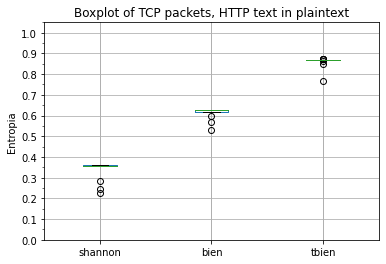

In [76]:
# Plot 2

title = 'Boxplot of {} packets, {} text in {}'.format(proto, text, encoding)
ax = df.plot(x='payload_size', y=['shannon','bien','tbien'],kind='box',title=title, grid=True)
ax.xaxis.grid(True, which='major', linestyle='-', linewidth=1)
ymajortick = arange(0,1.1,0.1)
yminortick = arange(0,1.1,0.05)
ax.set_ylabel("Entropia")
ax.set_yticks( ymajortick, minor=False )
ax.set_yticks( yminortick, minor=True )
ax.grid('on', which='both', axis='x' )
plt.savefig('Plots/rfc761/Cenarios/{}{}{}box.png'.format(proto, encoding, text), transparent=False)

In [77]:
# Table of data

df = df.describe()
print(df)

       srcport   dstport  payload_size    shannon       bien      tbien
count     25.0     25.00     25.000000  25.000000  25.000000  25.000000
mean    8080.0  11511.64   1201.000000   0.345837   0.616415   0.864105
std        0.0      1.80   2560.535003   0.036787   0.021599   0.020911
min     8080.0  11510.00    410.000000   0.225656   0.531655   0.765651
25%     8080.0  11510.00    410.000000   0.358548   0.617304   0.868586
50%     8080.0  11511.00    410.000000   0.358754   0.624682   0.868805
75%     8080.0  11513.00    411.000000   0.358962   0.624764   0.868867
max     8080.0  11515.00  10897.000000   0.358962   0.624768   0.871684


In [78]:
# Exporting new data

filename = 'Outputs/RFC761/{}{}{}data.csv'.format(proto, encoding, text)
df.to_csv(filename,',')